# EuroSAT Land Cover Dataset

In [1]:
%matplotlib inline

import random
import numpy as np
import os
import tifffile
from glob import glob

import matplotlib.pyplot as plt

In [2]:
root_dir = '.'
rgb_dir = os.path.join(root_dir, 'RGB')
ms_dir = os.path.join(root_dir, 'allBands')

## Label Distribution

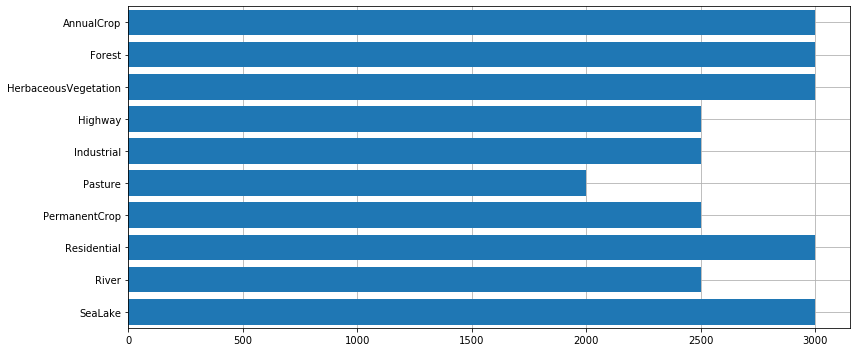

In [3]:
labels = sorted(os.listdir(rgb_dir))
img_counts = [len(glob(os.path.join(rgb_dir, lbl, '*.jpg'))) for lbl in labels]

plt.figure(figsize=(12, 5))
plt.barh(np.arange(len(labels)), img_counts)
plt.yticks(np.arange(len(labels)), labels)
plt.ylim(len(labels) - 0.5, -0.5)
plt.grid()
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

## Example Images

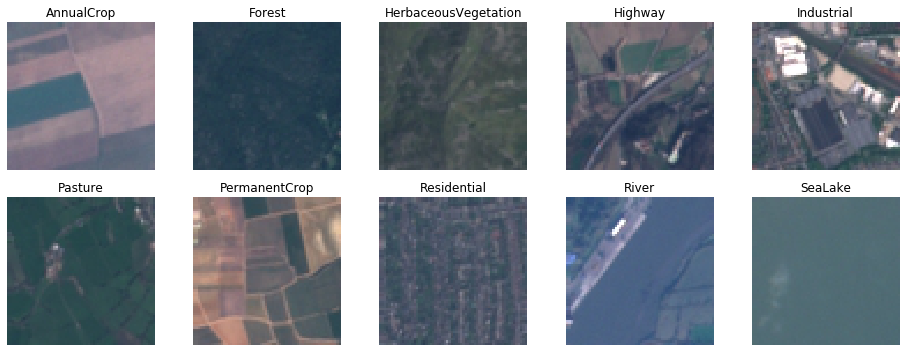

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(13, 5))
for lbl, ax in zip(labels, axes.ravel()):
    ax.set_title(lbl)
    ax.imshow(plt.imread(np.random.choice(glob(os.path.join(rgb_dir, lbl, '*.jpg')))))
    ax.axis('off')
fig.tight_layout()
plt.show()

## Multispectral Images

| Band |     Name     | Resolution | Wave Length |
|-----:|:-------------|-----------:|------------:|
|  00  | Aerosols     |       60 m |      443 nm |
|  01  | Blue         |       10 m |      490 nm |
|  02  | Green        |       10 m |      560 nm |
|  03  | Red          |       10 m |      665 nm |
|  04  | Red edge 1   |       20 m |      705 nm |
|  05  | Red edge 2   |       20 m |      740 nm |
|  06  | Red edge 3   |       20 m |      783 nm |
|  07  | NIR          |       10 m |      842 nm |
|  08  | Red edge 4   |       20 m |      865 nm |
|  09  | Water vapor  |       60 m |      945 nm |
|  10  | Cirrus       |       60 m |     1375 nm |
|  11  | SWIR 1       |       20 m |     1610 nm |
|  12  | SWIR 2       |       20 m |     2190 nm |

In [4]:
band_names = ['Aerosols', 'Blue', 'Green', 'Red', 'Red edge 1', 'Red edge 2', 'Red edge 3', 'NIR', 'Red edge 4',
              'Water vapor', 'Cirrus', 'SWIR 1', 'SWIR 2']

### Example RGB Image

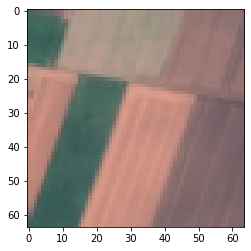

In [81]:
img_name = 'AnnualCrop/AnnualCrop_30'

plt.imshow(plt.imread(os.path.join(rgb_dir, img_name + '.jpg')))
plt.show()

### The same image loaded from the GeoTIFF file

In [82]:
ms_img = tifffile.imread(os.path.join(ms_dir, img_name + '.tif'))
ms_img.shape, ms_img.dtype

((64, 64, 13), dtype('uint16'))

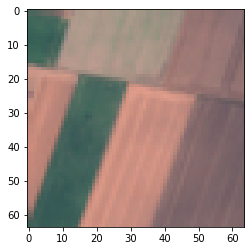

In [83]:
plt.imshow(ms_img[:,:,[3,2,1]] / 2750)
plt.show()

### All Bands

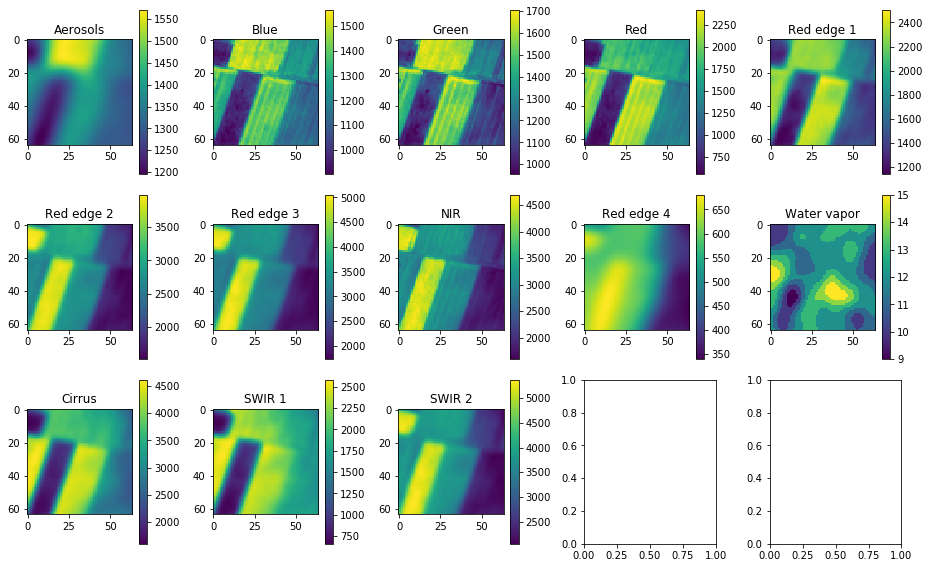

In [90]:
fig, axes = plt.subplots(3, 5, figsize=(13, 8))
for i, (band_name, ax) in enumerate(zip(band_names, axes.ravel())):
    ax.set_title(band_name)
    cmap = ax.imshow(ms_img[:,:,i])
    fig.colorbar(cmap, ax=ax)
fig.tight_layout()
plt.show()

## Train/Val/Test Split

    Train:  30 imgs/class
    Val:    20 imgs/class
    Test: 1950 imgs/class

In [5]:
class_members = [
    [fn for fn in os.listdir(os.path.join(rgb_dir, lbl)) if fn.endswith('.jpg')]
    for lbl in labels
]
for mem in class_members:
    random.shuffle(mem)

In [6]:
with open(os.path.join(root_dir, 'train.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for fn in mem[:30]:
            f.write(f'{labels[lbl_idx]}/{fn[:-4]} {lbl_idx}\n')

with open(os.path.join(root_dir, 'val.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for fn in mem[30:50]:
            f.write(f'{labels[lbl_idx]}/{fn[:-4]} {lbl_idx}\n')


with open(os.path.join(root_dir, 'trainval.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for fn in mem[:50]:
            f.write(f'{labels[lbl_idx]}/{fn[:-4]} {lbl_idx}\n')

with open(os.path.join(root_dir, 'test.txt'), 'w') as f:
    for lbl_idx, mem in enumerate(class_members):
        for fn in mem[50:2000]:
            f.write(f'{labels[lbl_idx]}/{fn[:-4]} {lbl_idx}\n')